# Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Training Data

In [2]:
df_train = pd.read_csv("../files/data/SINGLE_CRACK/CORNER_CRACK_COUNTERSUNK_HOLE/CORNER_CRACK_CS4_THROUGH_CS_THICKNESS_TRAIN.csv")
df_train

,c_index,W/R,a/c,a/t,r/t,b/t,phi,K-T,K-B,K-P
0,1.0,2.200,0.1,0.06,0.80,0.05,0.057972,0.894892,1.037923,0.375474
1,1.0,2.200,0.1,0.06,0.80,0.05,0.069428,0.910993,1.055438,0.382284
2,1.0,2.200,0.1,0.06,0.80,0.05,0.080884,0.930369,1.077269,0.390525
3,1.0,2.200,0.1,0.06,0.80,0.05,0.092340,0.952185,1.101195,0.399734
4,1.0,2.200,0.1,0.06,0.80,0.05,0.103796,0.975797,1.127265,0.409731
...,...,...,...,...,...,...,...,...,...,...
8089339,85619.0,805.529,10.0,0.50,0.25,0.05,0.143331,8.230975,1.895023,2.199626
8089340,85619.0,805.529,10.0,0.50,0.25,0.05,0.144197,8.216461,1.889060,2.194242
8089341,85619.0,805.529,10.0,0.50,0.25,0.05,0.145064,8.201024,1.882899,2.188658
8089342,85619.0,805.529,10.0,0.50,0.25,0.05,0.145930,8.184740,1.876549,2.182884


In [3]:
# Get unique combinations of the first four columns
train_combinations = df_train.iloc[:, 1:5].drop_duplicates().to_numpy()

print(len(train_combinations))

63198


In [4]:
print("Different W/R values: ", np.unique(train_combinations[:,0], axis=0))
print("Different a/c values: ", np.unique(train_combinations[:,1], axis=0))
print("Different a/t values: ", np.unique(train_combinations[:,2], axis=0))
print("Different r/t values: ", np.unique(train_combinations[:,3], axis=0))
print("Different phi values: ", np.unique(df_train.iloc[:,6], axis=0))

Different W/R values:  [1.600000e+00 1.800000e+00 2.000000e+00 2.200000e+00 2.400000e+00
 2.600000e+00 2.800000e+00 2.997000e+00 3.147000e+00 3.200000e+00
 3.297000e+00 3.447000e+00 3.600000e+00 3.664000e+00 3.672000e+00
 3.864000e+00 3.897000e+00 4.000000e+00 4.064000e+00 4.197000e+00
 4.264000e+00 4.564000e+00 4.571000e+00 4.600000e+00 4.864000e+00
 4.946000e+00 5.200000e+00 5.264000e+00 5.321000e+00 5.696000e+00
 5.764000e+00 5.800000e+00 5.929000e+00 6.264000e+00 6.329000e+00
 6.400000e+00 6.446000e+00 6.729000e+00 6.764000e+00 7.000000e+00
 7.129000e+00 7.195000e+00 7.264000e+00 7.529000e+00 8.000000e+00
 8.129000e+00 8.264000e+00 8.694000e+00 8.729000e+00 9.000000e+00
 9.264000e+00 9.529000e+00 1.000000e+01 1.052900e+01 1.126400e+01
 1.152900e+01 1.169300e+01 1.200000e+01 1.252900e+01 1.352900e+01
 1.526400e+01 1.552900e+01 1.600000e+01 1.619100e+01 1.752900e+01
 2.000000e+01 2.068800e+01 2.126400e+01 2.152900e+01 2.668500e+01
 2.726400e+01 2.952900e+01 3.000000e+01 3.268200e+01 

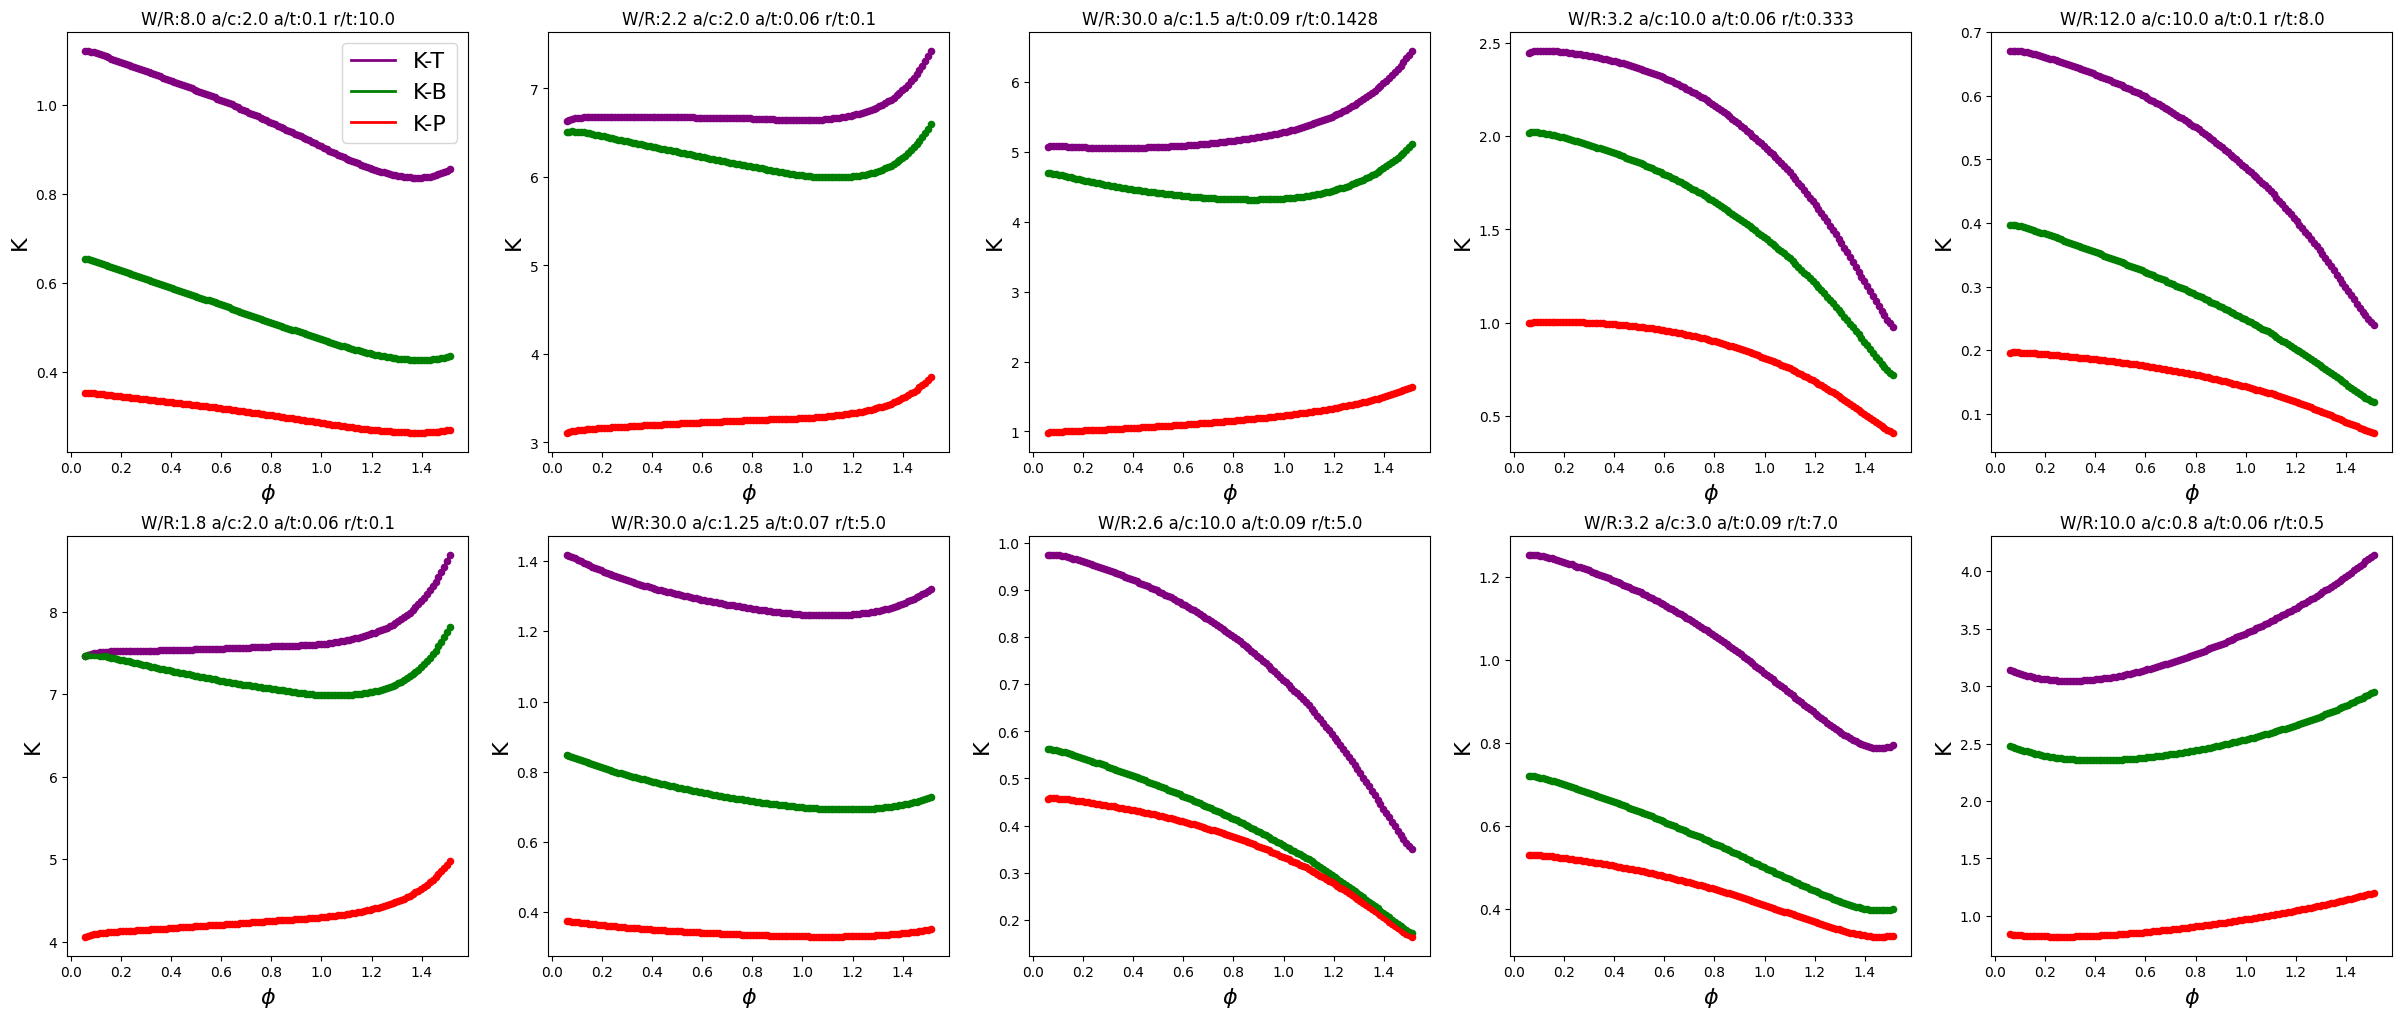

In [5]:
d = df_train.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(10)
fig, axs = plt.subplots(2, 5, figsize=(30,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a_c = np.unique(data[:,2])
        a_t = np.unique(data[:,3])
        r_t = np.unique(data[:,4])

        assert len(W_R) == 1
        assert len(a_c) == 1
        assert len(a_t) == 1
        assert len(r_t) == 1

        axs[i,j].plot(data[:,-4], data[:,-3], label="K-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-3], color='purple', s=20)

        axs[i,j].plot(data[:,-4], data[:,-2], label="K-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-2], color='green', s=20)

        axs[i,j].plot(data[:,-4], data[:,-1], label="K-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-1], color='red', s=20)

        axs[i,j].set_title("W/R:{} a/c:{} a/t:{} r/t:{}".format(W_R[0], a_c[0], a_t[0], r_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()

# Testing Data

In [6]:
df_test = pd.read_csv("../files/data/SINGLE_CRACK/CORNER_CRACK_COUNTERSUNK_HOLE/CORNER_CRACK_CS4_THROUGH_CS_THICKNESS_TEST.csv")
df_test

,c_index,W/R,a/c,a/t,r/t,b/t,phi,K-T,K-B,K-P
0,0.0,2.000,0.1,0.06,0.80,0.05,0.057972,0.842139,1.115828,0.383158
1,0.0,2.000,0.1,0.06,0.80,0.05,0.069428,0.857512,1.134381,0.390177
2,0.0,2.000,0.1,0.06,0.80,0.05,0.080884,0.876011,1.157875,0.398741
3,0.0,2.000,0.1,0.06,0.80,0.05,0.092340,0.896791,1.183432,0.408275
4,0.0,2.000,0.1,0.06,0.80,0.05,0.103796,0.919300,1.211090,0.418643
...,...,...,...,...,...,...,...,...,...,...
2696571,85618.0,605.529,10.0,0.50,0.25,0.05,0.143331,8.221077,5.968954,2.200626
2696572,85618.0,605.529,10.0,0.50,0.25,0.05,0.144197,8.206606,5.949951,2.195242
2696573,85618.0,605.529,10.0,0.50,0.25,0.05,0.145064,8.191164,5.930312,2.189658
2696574,85618.0,605.529,10.0,0.50,0.25,0.05,0.145930,8.174834,5.910068,2.183884


In [7]:
# Get unique combinations of the first four columns
test_combinations = df_test.iloc[:, 1:5].drop_duplicates().to_numpy()

print(len(test_combinations))

21067


In [8]:
print("Different W/R values: ", np.unique(test_combinations[:,0], axis=0))
print("Different a/c values: ", np.unique(test_combinations[:,1], axis=0))
print("Different a/t values: ", np.unique(test_combinations[:,2], axis=0))
print("Different r/t values: ", np.unique(test_combinations[:,3], axis=0))
print("Different phi values: ", np.unique(df_test.iloc[:,6], axis=0))

Different W/R values:  [1.600000e+00 1.800000e+00 2.000000e+00 2.200000e+00 2.400000e+00
 2.600000e+00 2.800000e+00 2.997000e+00 3.147000e+00 3.200000e+00
 3.297000e+00 3.447000e+00 3.600000e+00 3.664000e+00 3.672000e+00
 3.864000e+00 3.897000e+00 4.000000e+00 4.064000e+00 4.197000e+00
 4.264000e+00 4.564000e+00 4.571000e+00 4.600000e+00 4.864000e+00
 4.946000e+00 5.200000e+00 5.264000e+00 5.321000e+00 5.696000e+00
 5.764000e+00 5.800000e+00 5.929000e+00 6.264000e+00 6.329000e+00
 6.400000e+00 6.446000e+00 6.729000e+00 6.764000e+00 7.000000e+00
 7.129000e+00 7.195000e+00 7.264000e+00 7.529000e+00 8.000000e+00
 8.129000e+00 8.264000e+00 8.694000e+00 8.729000e+00 9.000000e+00
 9.264000e+00 9.529000e+00 1.000000e+01 1.052900e+01 1.126400e+01
 1.152900e+01 1.169300e+01 1.200000e+01 1.252900e+01 1.352900e+01
 1.526400e+01 1.552900e+01 1.600000e+01 1.619100e+01 1.752900e+01
 2.000000e+01 2.068800e+01 2.126400e+01 2.152900e+01 2.668500e+01
 2.726400e+01 2.952900e+01 3.000000e+01 3.268200e+01 

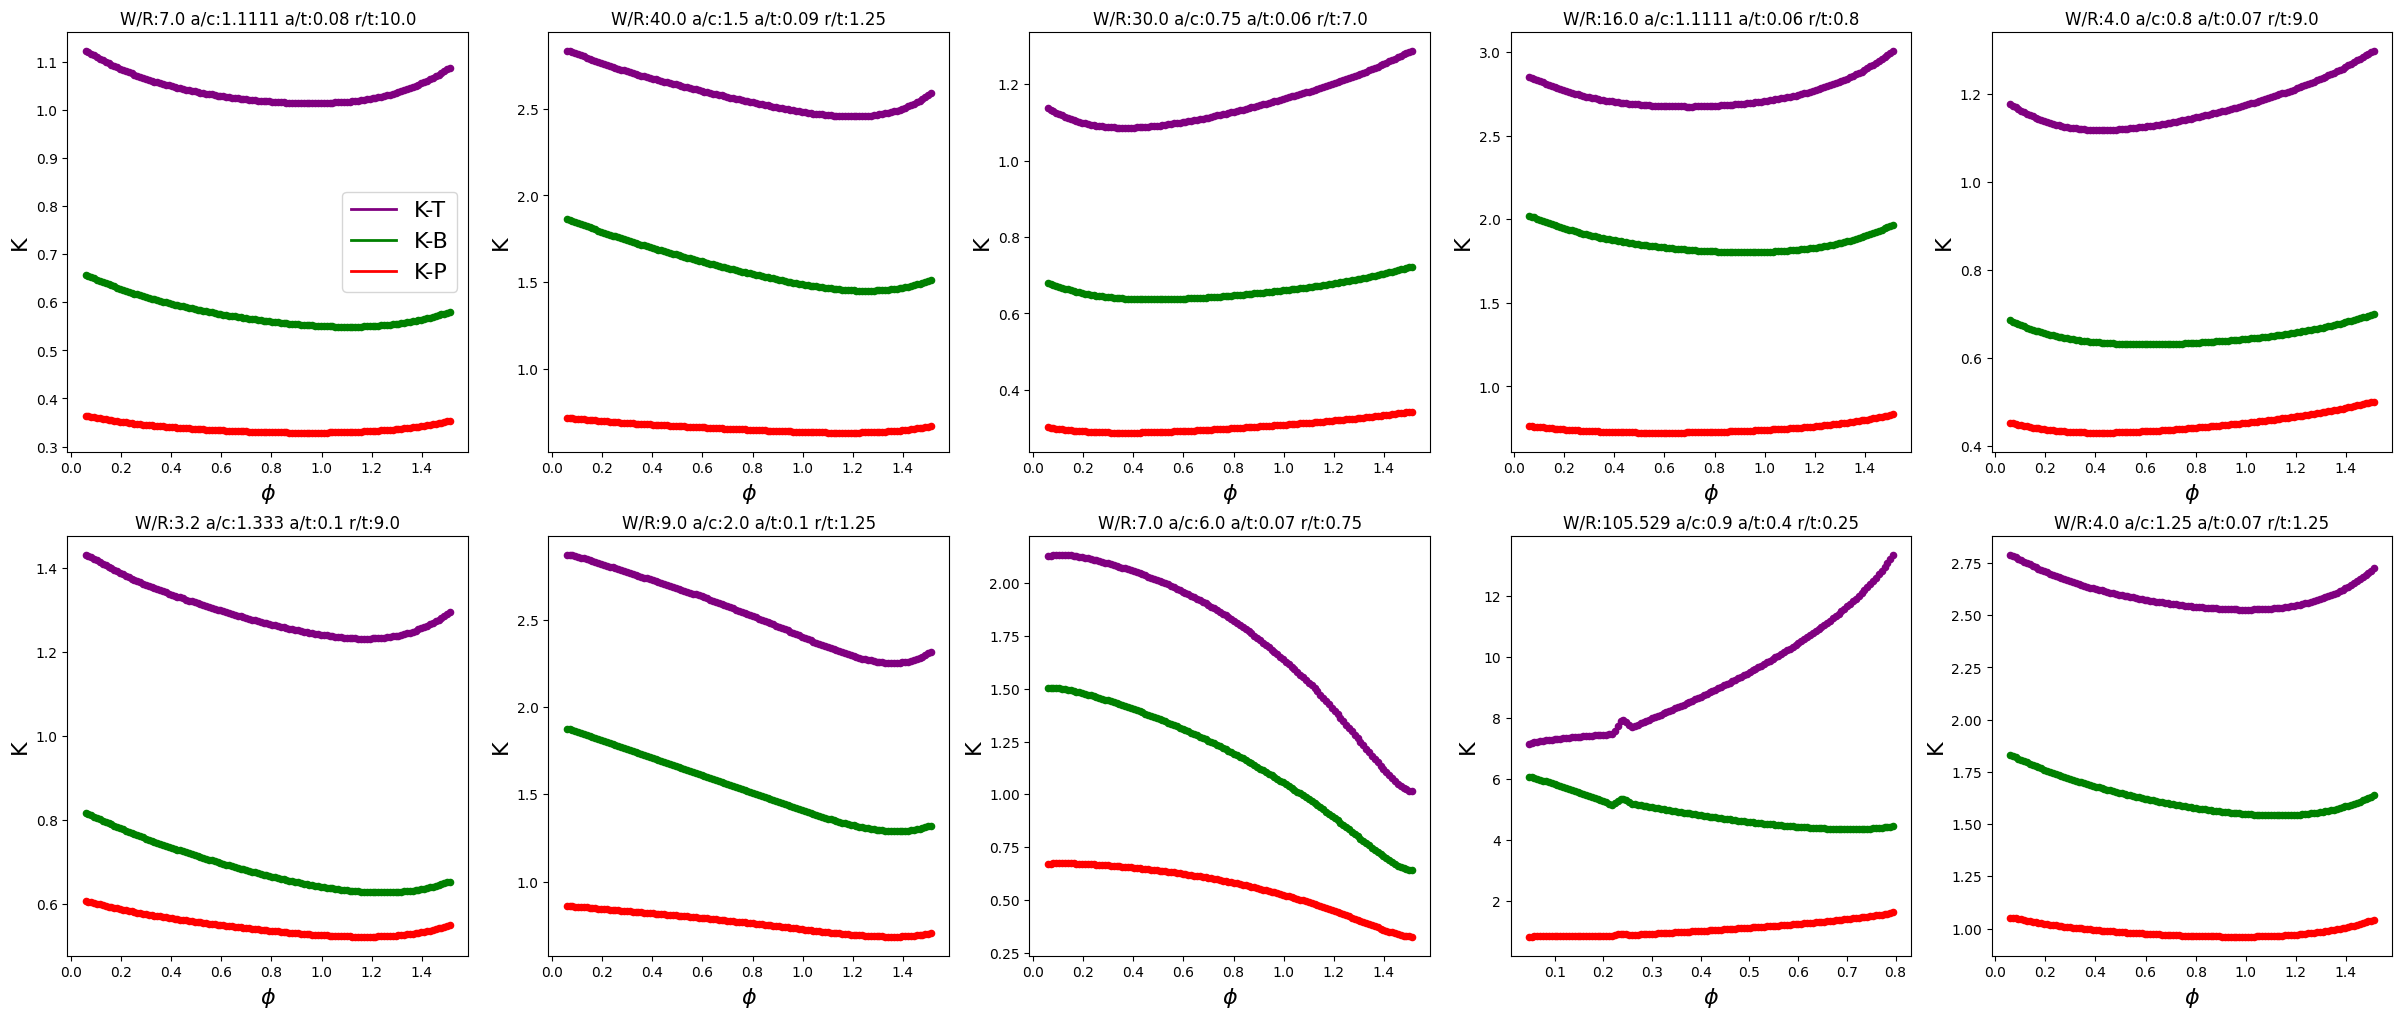

In [9]:
d = df_test.to_numpy()

num_crack = np.unique(d[:,0])

np.random.seed(100)
fig, axs = plt.subplots(2, 5, figsize=(30,12))
for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(num_crack))
        data = d[idx*128:idx*128+128]
        W_R = np.unique(data[:,1])
        a_c = np.unique(data[:,2])
        a_t = np.unique(data[:,3])
        r_t = np.unique(data[:,4])

        assert len(W_R) == 1
        assert len(a_c) == 1
        assert len(a_t) == 1
        assert len(r_t) == 1

        axs[i,j].plot(data[:,-4], data[:,-3], label="K-T", color='purple', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-3], color='purple', s=20)

        axs[i,j].plot(data[:,-4], data[:,-2], label="K-B", color='green', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-2], color='green', s=20)

        axs[i,j].plot(data[:,-4], data[:,-1], label="K-P", color='red', linestyle="-", linewidth=2)
        axs[i,j].scatter(data[:,-4], data[:,-1], color='red', s=20)

        axs[i,j].set_title("W/R:{} a/c:{} a/t:{} r/t:{}".format(W_R[0], a_c[0], a_t[0], r_t[0]))
        axs[i,j].set_ylabel("K", fontsize=16)
        axs[i,j].set_xlabel(r"$\phi$", fontsize=16)
        
        if i == 0 and j == 0:
            axs[i,j].legend(fontsize=16)

plt.show()